 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [30]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [31]:
# Setting Path to whale_returns.csv
whale_returns_csvpath = Path("../module_4_challenge/Resources/whale_returns.csv")

# Creating a DataFrame from a CSV file
whale_returns_dataframe = pd.read_csv(whale_returns_csvpath, index_col="Date", parse_dates=True, infer_datetime_format=True)

# Sort Data
whale_returns_dataframe.sort_index(ascending = True, inplace = True)

# Display DataFrames's Headers
whale_returns_dataframe.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [32]:
# Count nulls
whale_returns_dataframe.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [33]:
# Drop nulls
whale_returns_dataframe.dropna(inplace = True)

# Verify Nulls are Removed
whale_returns_dataframe.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [34]:
# Setting Path to whale_returns.csv
algo_returns_csvpath = Path("../module_4_challenge/Resources/algo_returns.csv")

# Creating a DataFrame from a CSV file
algo_returns_dataframe = pd.read_csv(algo_returns_csvpath, index_col="Date", parse_dates=True, infer_datetime_format=True)

# Sort Data
algo_returns_dataframe.sort_index(ascending = True, inplace = True)

# Display DataFrames's Headers
algo_returns_dataframe.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [35]:
# Count nulls
algo_returns_dataframe.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [36]:
# Drop nulls
algo_returns_dataframe.dropna(inplace = True)

# Verify Nulls are Removed
algo_returns_dataframe.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [37]:
# Setting Path to whale_returns.csv
sp_tsx_history_csvpath = Path("../module_4_challenge/Resources/sp_tsx_history.csv")

# Creating a DataFrame from a CSV file
sp_tsx_history_dataframe = pd.read_csv(sp_tsx_history_csvpath, index_col="Date", parse_dates=True, infer_datetime_format=True)

# Sort Data
sp_tsx_history_dataframe.sort_index(ascending = True, inplace = True)

# Display DataFrames's Headers
sp_tsx_history_dataframe.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [38]:
# Check Data Types
sp_tsx_history_dataframe.dtypes

Close    object
dtype: object

In [39]:
# Remove Non-Numerical Values
sp_tsx_history_dataframe["Close"]= sp_tsx_history_dataframe["Close"].str.replace('$','',regex = True)
sp_tsx_history_dataframe["Close"]= sp_tsx_history_dataframe["Close"].str.replace(',','')

# Fix Data Types
sp_tsx_history_dataframe["Close"] = sp_tsx_history_dataframe["Close"].astype("float")
sp_tsx_history_dataframe.dtypes

Close    float64
dtype: object

In [40]:
# Calculate Daily Returns
sp_tsx_daily_returns_dataframe = sp_tsx_history_dataframe.pct_change()

In [41]:
# Count nulls
sp_tsx_daily_returns_dataframe.isnull().sum()

Close    1
dtype: int64

In [42]:
# Drop nulls
sp_tsx_daily_returns_dataframe.dropna(inplace = True)

# Verify Nulls are Removed
sp_tsx_daily_returns_dataframe.isnull().sum()

Close    0
dtype: int64

In [45]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_daily_returns_dataframe.rename(columns = {"Close":"SP TSX"}, inplace = True)
sp_tsx_daily_returns_dataframe.head()

,SP TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [46]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_portfolios_dataframe = pd.concat([whale_returns_dataframe,algo_returns_dataframe,sp_tsx_daily_returns_dataframe],axis = 'columns',join = 'inner')
combined_portfolios_dataframe.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


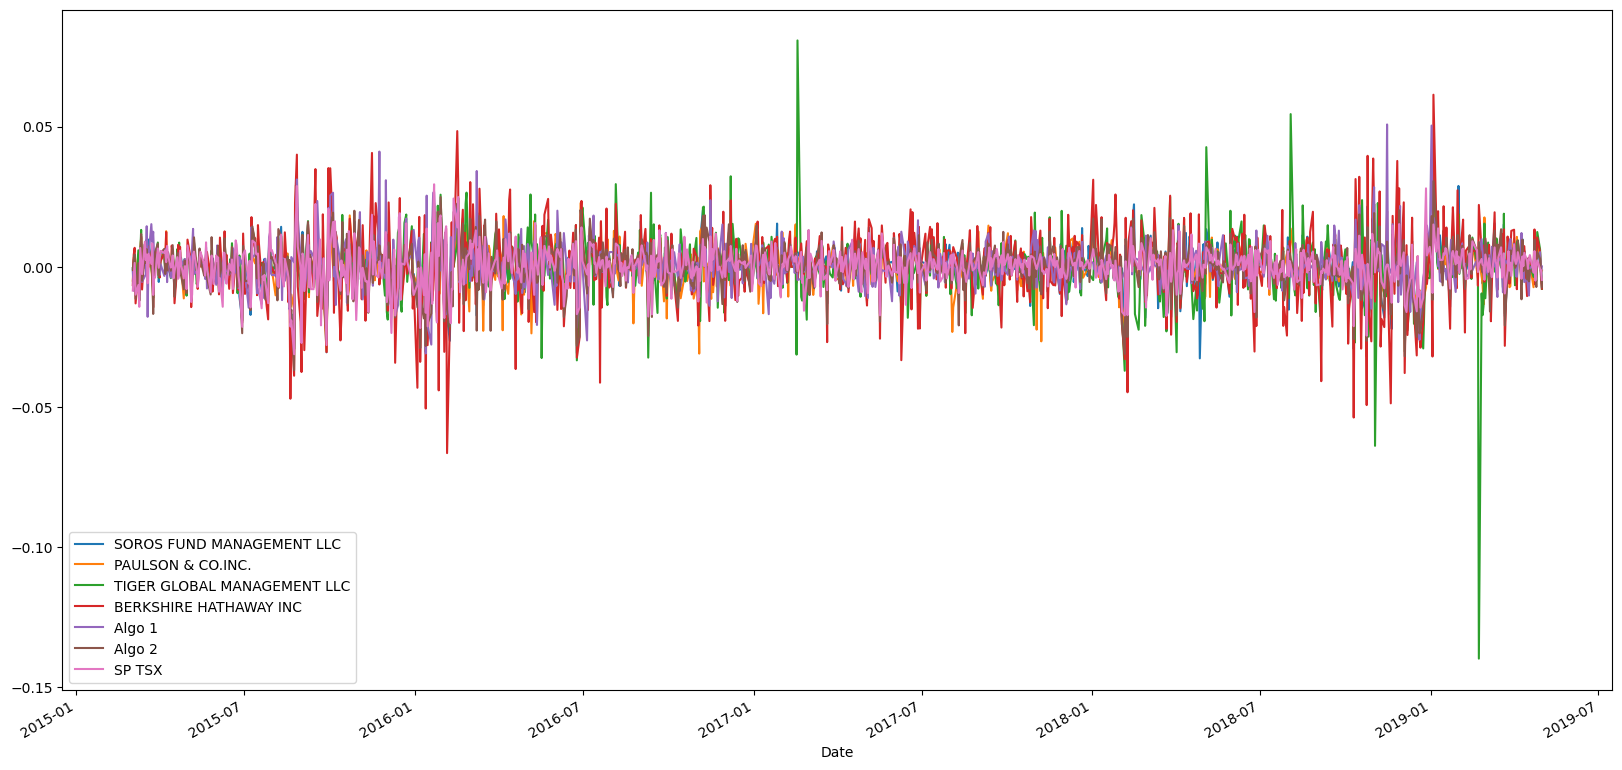

In [51]:
# Plot daily returns of all portfolios
combined_portfolios_dataframe.plot(figsize=(20,10))
combined_portfolios_dataframe.head()

#### Calculate and Plot cumulative returns.

All the portfolios outperform except S&P TSX 60 were Tiger Global Management LLC and Paulson & Co.Inc.


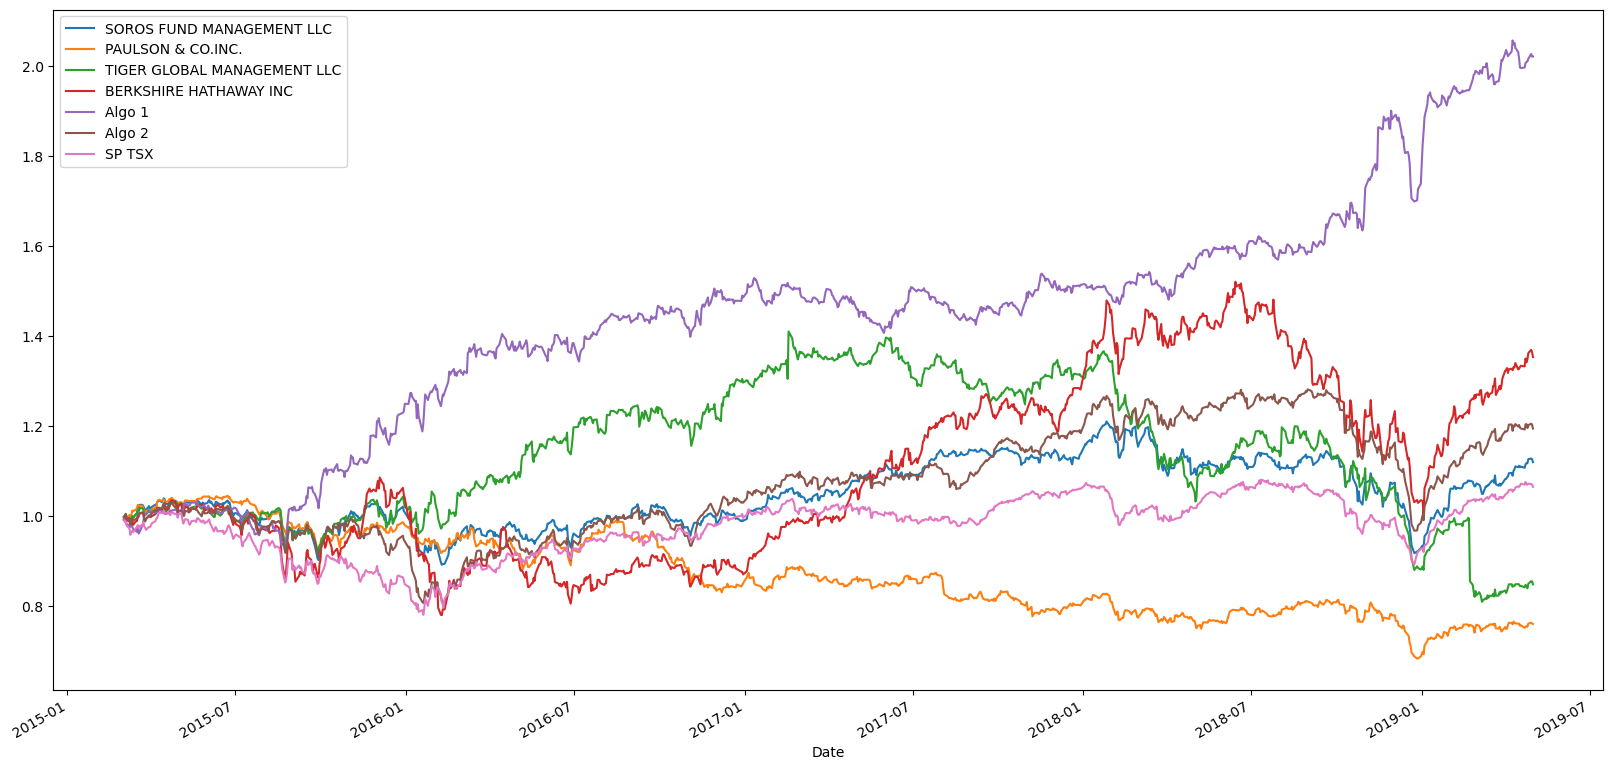

In [70]:
# Calculate cumulative returns of all portfolios
cumulative_returns_dataframe = (1 + combined_portfolios_dataframe).cumprod()

# Plot cumulative returns
cumulative_returns_dataframe.plot(figsize = (20,10))

In [71]:
print("All the portfolios outperform except S&P TSX 60 were Tiger Global Management LLC and Paulson & Co.Inc.")

All the portfolios outperform except S&P TSX 60 were Tiger Global Management LLC and Paulson & Co.Inc.


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

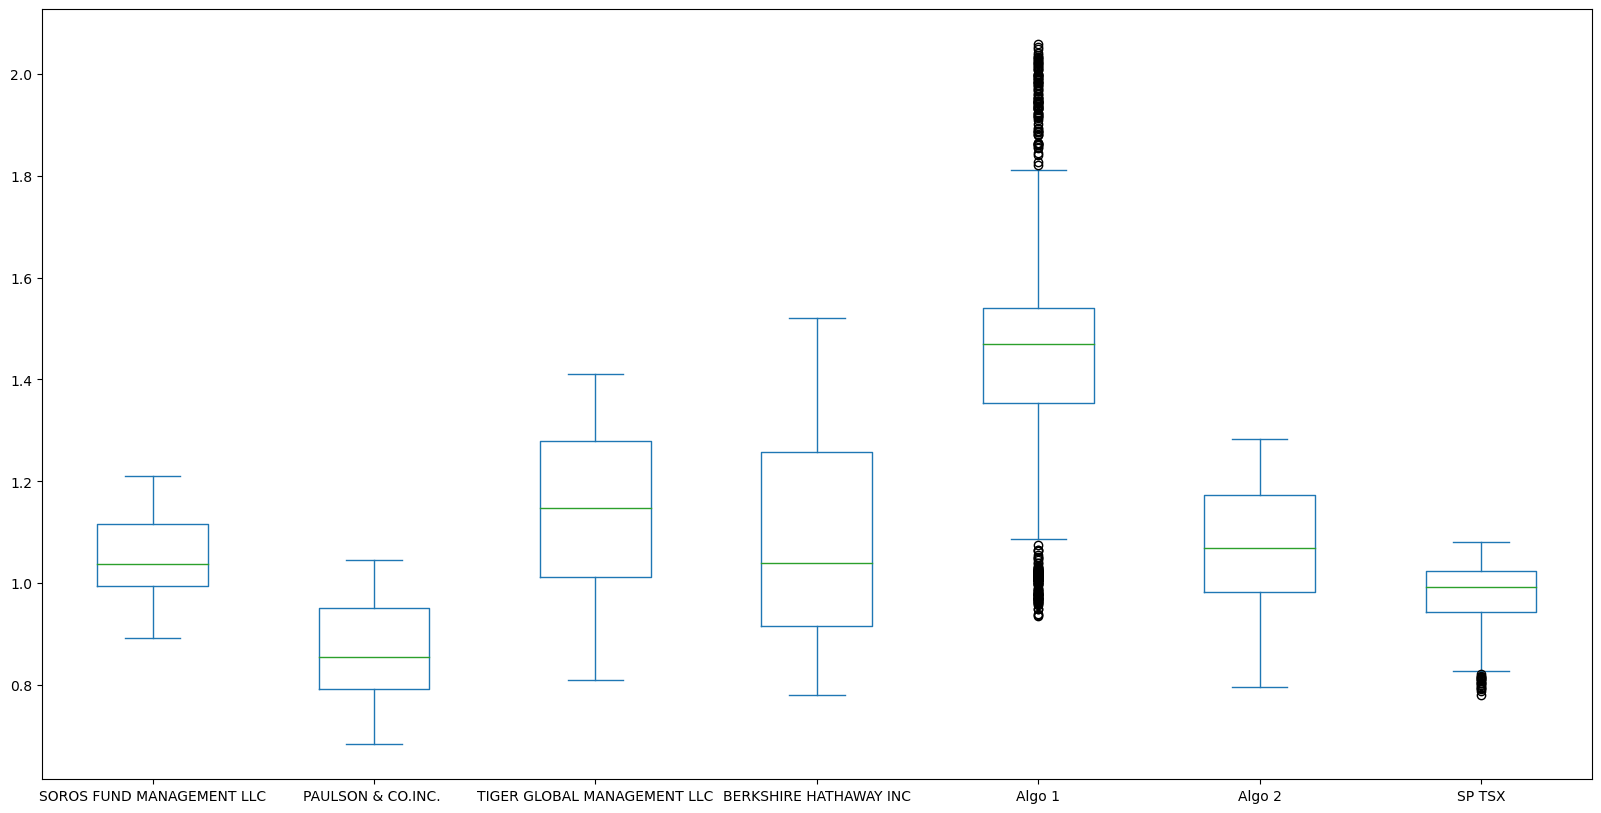

In [56]:
# Box plot to visually show risk
cumulative_returns_dataframe.plot(kind = "box", figsize = (20,10))

### Calculate Standard Deviations

In [63]:
# Calculate the daily standard deviations of all portfolios
daily_standard = cumulative_returns_dataframe.std()
daily_standard

SOROS FUND MANAGEMENT LLC      0.070271
PAULSON & CO.INC.              0.090735
TIGER GLOBAL MANAGEMENT LLC    0.148722
BERKSHIRE HATHAWAY INC         0.196871
Algo 1                         0.258839
Algo 2                         0.116607
SP TSX                         0.064354
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [64]:
# Calculate  the daily standard deviation of S&P TSX 60
daily_standard_sp = daily_standard["SP TSX"]

# Determine which portfolios are riskier than the S&P TSX 60
portfolios_riskier_than_sp =[daily_standard > daily_standard_sp]
portfolios_riskier_than_sp

[SOROS FUND MANAGEMENT LLC       True
 PAULSON & CO.INC.               True
 TIGER GLOBAL MANAGEMENT LLC     True
 BERKSHIRE HATHAWAY INC          True
 Algo 1                          True
 Algo 2                          True
 SP TSX                         False
 dtype: bool]

### Calculate the Annualized Standard Deviation

In [66]:
# Calculate the annualized standard deviation (252 trading days)
annualized_standard = daily_standard * np.sqrt(252)
annualized_standard.head()

SOROS FUND MANAGEMENT LLC      1.115525
PAULSON & CO.INC.              1.440370
TIGER GLOBAL MANAGEMENT LLC    2.360896
BERKSHIRE HATHAWAY INC         3.125227
Algo 1                         4.108944
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

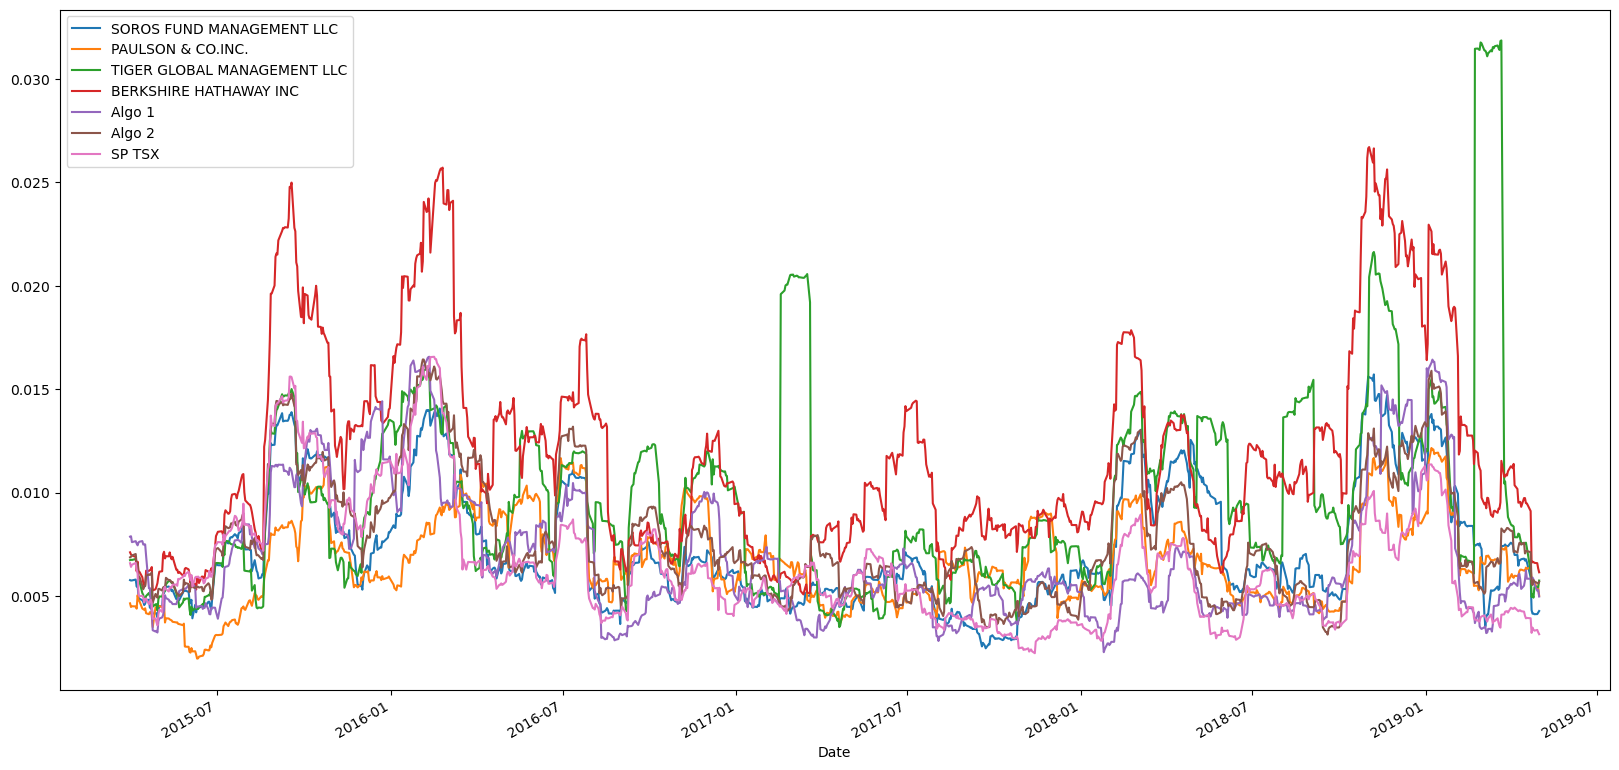

In [78]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_standard_deviation = combined_portfolios_dataframe.rolling(window = 21).std()

# Plot the rolling standard deviation
rolling_standard_deviation.plot(figsize = (20,10))

### Calculate and plot the correlation

<AxesSubplot:>

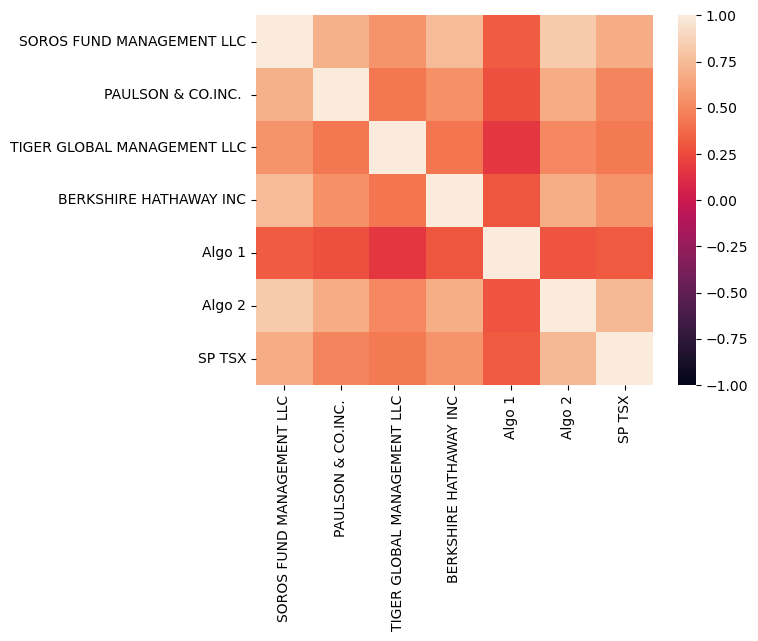

In [82]:
# Calculate the correlation
correlation = combined_portfolios_dataframe.corr()

# Display de correlation matrix

import seaborn as sns
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:xlabel='Date'>

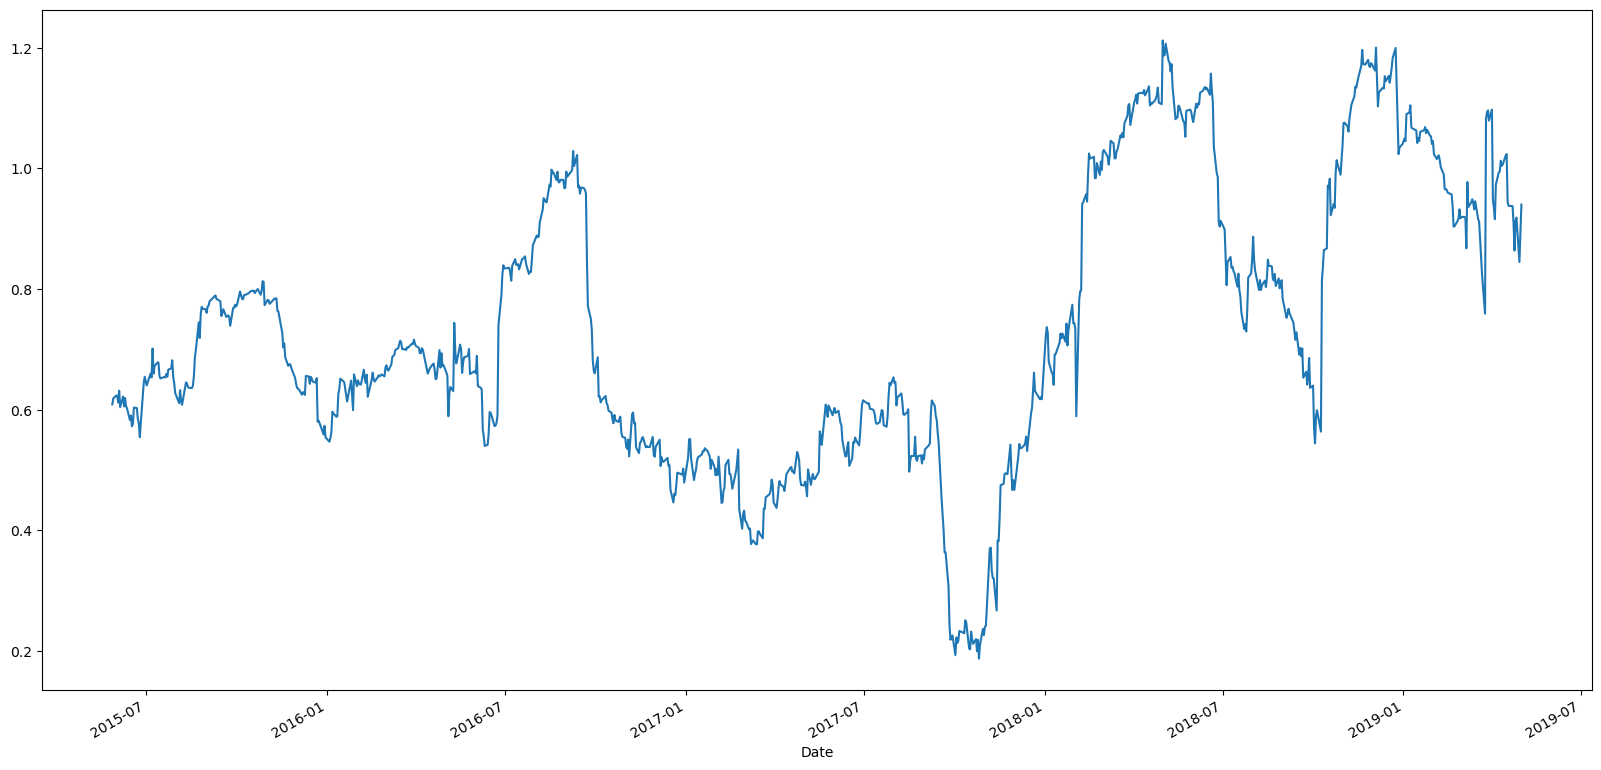

In [105]:
# Calculate covariance of a single portfolio
covariance_soroos_fund_management_llc = combined_portfolios_dataframe["SOROS FUND MANAGEMENT LLC"].rolling(window=60).cov(combined_portfolios_dataframe["SP TSX"])
      
# Calculate variance of S&P TSX
variance_sp_tsx = combined_portfolios_dataframe["SP TSX"].rolling(window=60).var()

# Computing beta
beta_soroos_fund_management_llc = covariance_soroos_fund_management_llc / variance_sp_tsx

# Plot beta trend
beta_soroos_fund_management_llc.plot (figsize=(20, 10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [ ]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [107]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_portfolios_dataframe.mean() * 252) / (combined_portfolios_dataframe.std() * np.sqrt(252))

<AxesSubplot:>

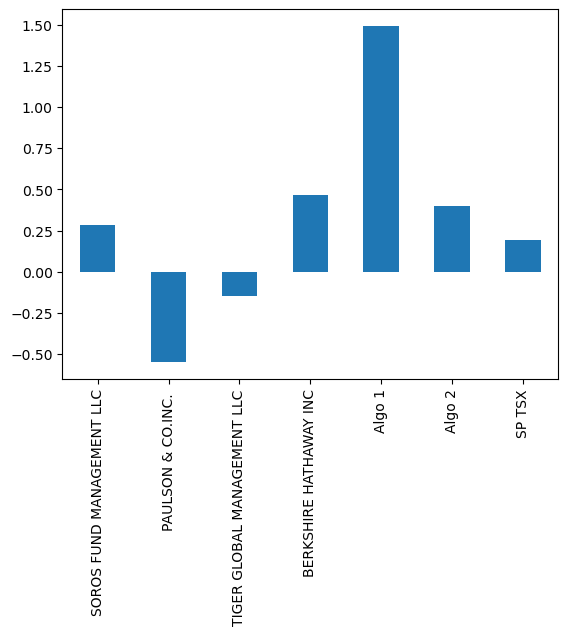

In [108]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Algo 1 outperformed both markets.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [ ]:
# Reading data from 1st stock


In [ ]:
# Reading data from 2nd stock


In [ ]:
# Reading data from 3rd stock


In [ ]:
# Combine all stocks in a single DataFrame


In [ ]:
# Reset Date index


In [ ]:
# Reorganize portfolio data by having a column per symbol


In [ ]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!